# **Telecom Customer Churn Analysis**

### **Step 1:Importing Required Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

### **Step 2: Load the Dataset**

In [2]:
df = pd.read_csv('Telecom Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Step 3: Identify the Dataframe**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Step 4:Replacing blank with 0 as tenure is 0 and no total charges are recorded and converted** 
### **the data type object to float** 

In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

#### Recheck the changes in Dataframe 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Step 4:now we find the overall null value on entire dataset** 

In [13]:
df.isnull().sum().sum()

np.int64(0)

### **Step 5:now perform the descriptive analysis of dataset** 

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### **Step 6:Now we check the duplicate entry on the entire dataset** 

In [11]:
df.duplicated().sum()

np.int64(0)

#### Now we check the duplicacy on the basis of unique identfication series 

In [14]:
df["customerID"].duplicated().sum()


np.int64(0)

### **Step 7:Now we convert value of  senior citizen row (0,1) to 'YES' and 'NO' to make it easier to understand**

In [4]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#### Now we check the first 30 rows of dataset to identified the changes 

In [20]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### **Step 8: Now we begin analysis why customer churn out or discontinued uses our services?**

### First we conduct basic understanding how much count customer churn out or not

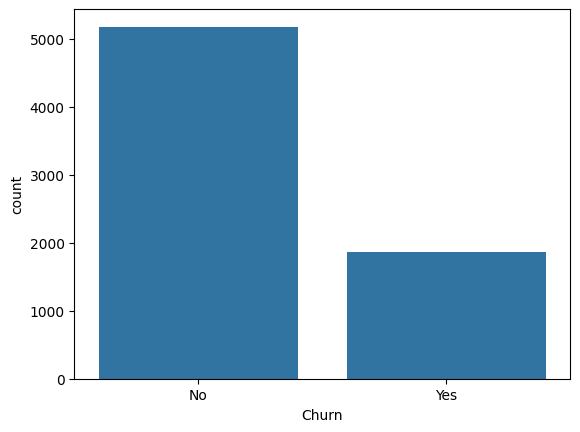

In [23]:
sns.countplot(x = df['Churn'])
plt.show()

#### To show the value and title on bar chart now we make some changes on this formula 
#### Bar label formula is to show the values on bar

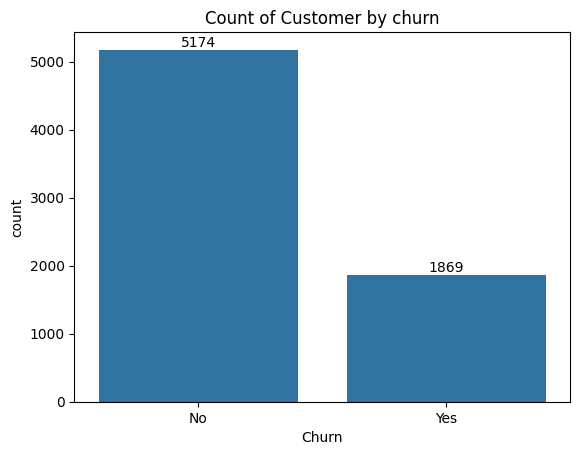

In [26]:
ax = sns.countplot(x = df['Churn'])

ax.bar_label(ax.containers[0])
plt.title("Count of Customer by churn")
plt.show()

#### Now we extratct a percentage of customer churn or not on piechart 
#### Figure size is for change thesize of chart

C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


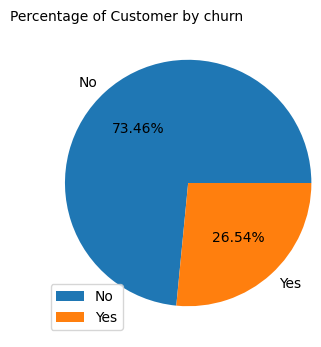

In [41]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
sns.countplot(x = df['Churn'])
plt.title("Percentage of Customer by churn", fontsize = 10)
plt.show()

#### From the given pie chart we can now conclude **26.54% customers have churned out** 
#### now explore the reason behind it 

#### ........

#### Now we explore that the **gender distrubution** is the reason?
#### **hue command** is for distribute or filter the dataset on the basis of specific column 

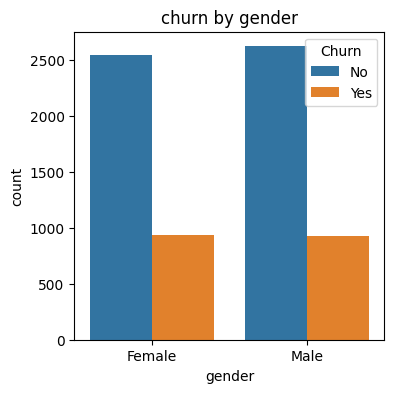

In [47]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'gender', hue='Churn', data=df)
plt.title("churn by gender")
plt.show()


#### The gender distribution is not the reason because the figure are same of both genders

#### ......

#### Now we check the senior citizens make impact on churn or not 
#### By applying same previous code but change row name **'seniorcitizon'**

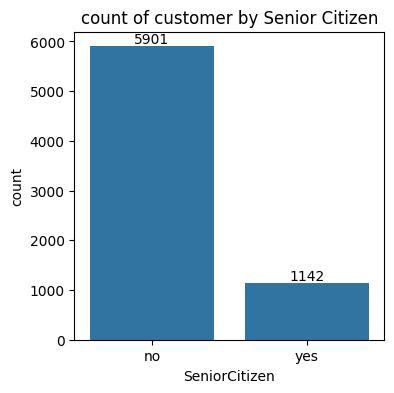

In [15]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)

ax.bar_label(ax.containers[0])
plt.title("count of customer by Senior Citizen")
plt.show()

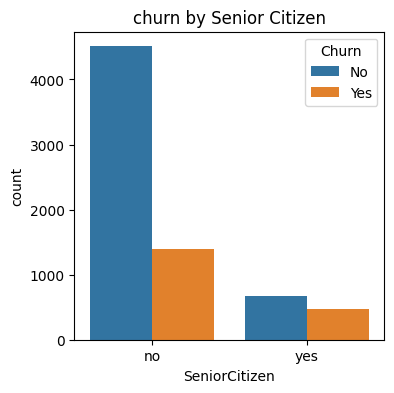

In [48]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'SeniorCitizen', hue='Churn', data=df)
plt.title("churn by Senior Citizen")
plt.show()

#### Now we import the senior citizen data in the % in stacked bar chart/ with the help of **Chatgpt** by given him prompt-
#### **'I want to create stacked bar chart which gives me labels as % of total'**

<Figure size 300x300 with 0 Axes>

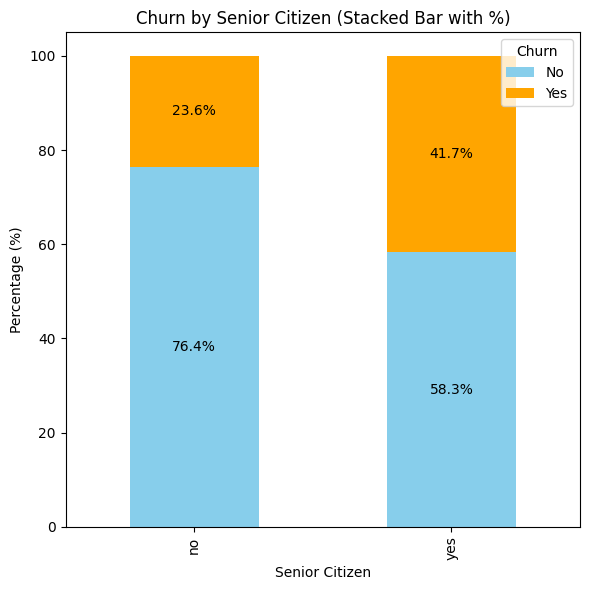

In [9]:
plt.figure(figsize = (3,3))
# Calculate the percentage values
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting
ax = percentages.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'orange'])

# Add percentages as labels on the bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Avoid labels for zero height
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            f'{height:.1f}%',
            ha='center',
            va='center',
            fontsize=10,
            color='black'
        )

plt.title("Churn by Senior Citizen (Stacked Bar with %)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

#### **Comparitively a greater percentage of people in senior citizen category have churned out** 

#### ......

#### Now we analyze churned out on the basis of **Tenure** 
#### **histplot= histogram plot**

<function matplotlib.pyplot.show(close=None, block=None)>

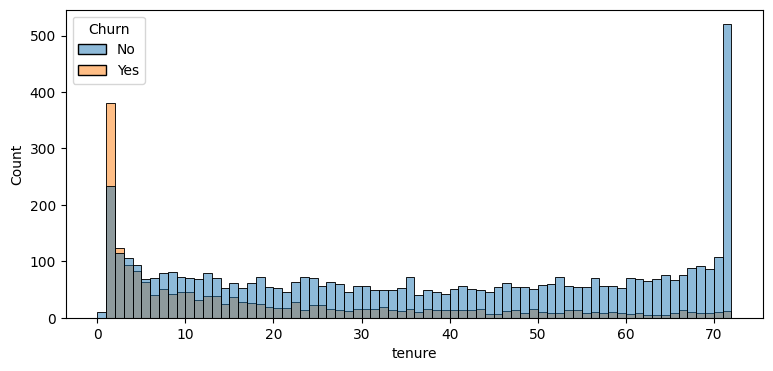

In [19]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure" , data = df, bins = 72, hue = 'Churn')
plt.show

#### **Finding from tenure:** people used our service long time have stayed and people used our service for 1 or 2 months have churned 

#### So the thing is people is churned on early stages of their subscription the conclusion is people 
#### who buy long term contract is stayed and people who buy short term contract is churned initially 

#### .......

#### Now we analyse the data based on count of **contract** to identifies what type of people we have on the based of contract 

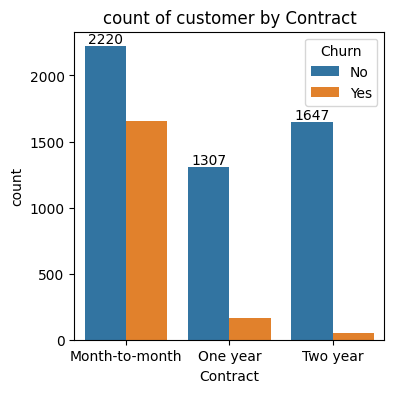

In [22]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')

ax.bar_label(ax.containers[0])
plt.title("count of customer by Contract")
plt.show()

#### So now we identified people who buy **month to month contract** have churned most compare to one or two year contract 
#### So to handle this situation we basically do to convince customer to buy one or two year contract 

#### ....

#### Now we identified all column exist in the dataset

In [26]:
df.columns.values  

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### **'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',**
#### **'TechSupport', 'StreamingTV', 'StreamingMovies'** 
#### These are the particular services that consumer useso now we create a subplots of these column using chatgpt prompt-
#### **'these are the column and i want to create the subplots from the data where each plot would be count plot'**
#### subplots basically use to create multiple plots or visulization on single plot on countplot 

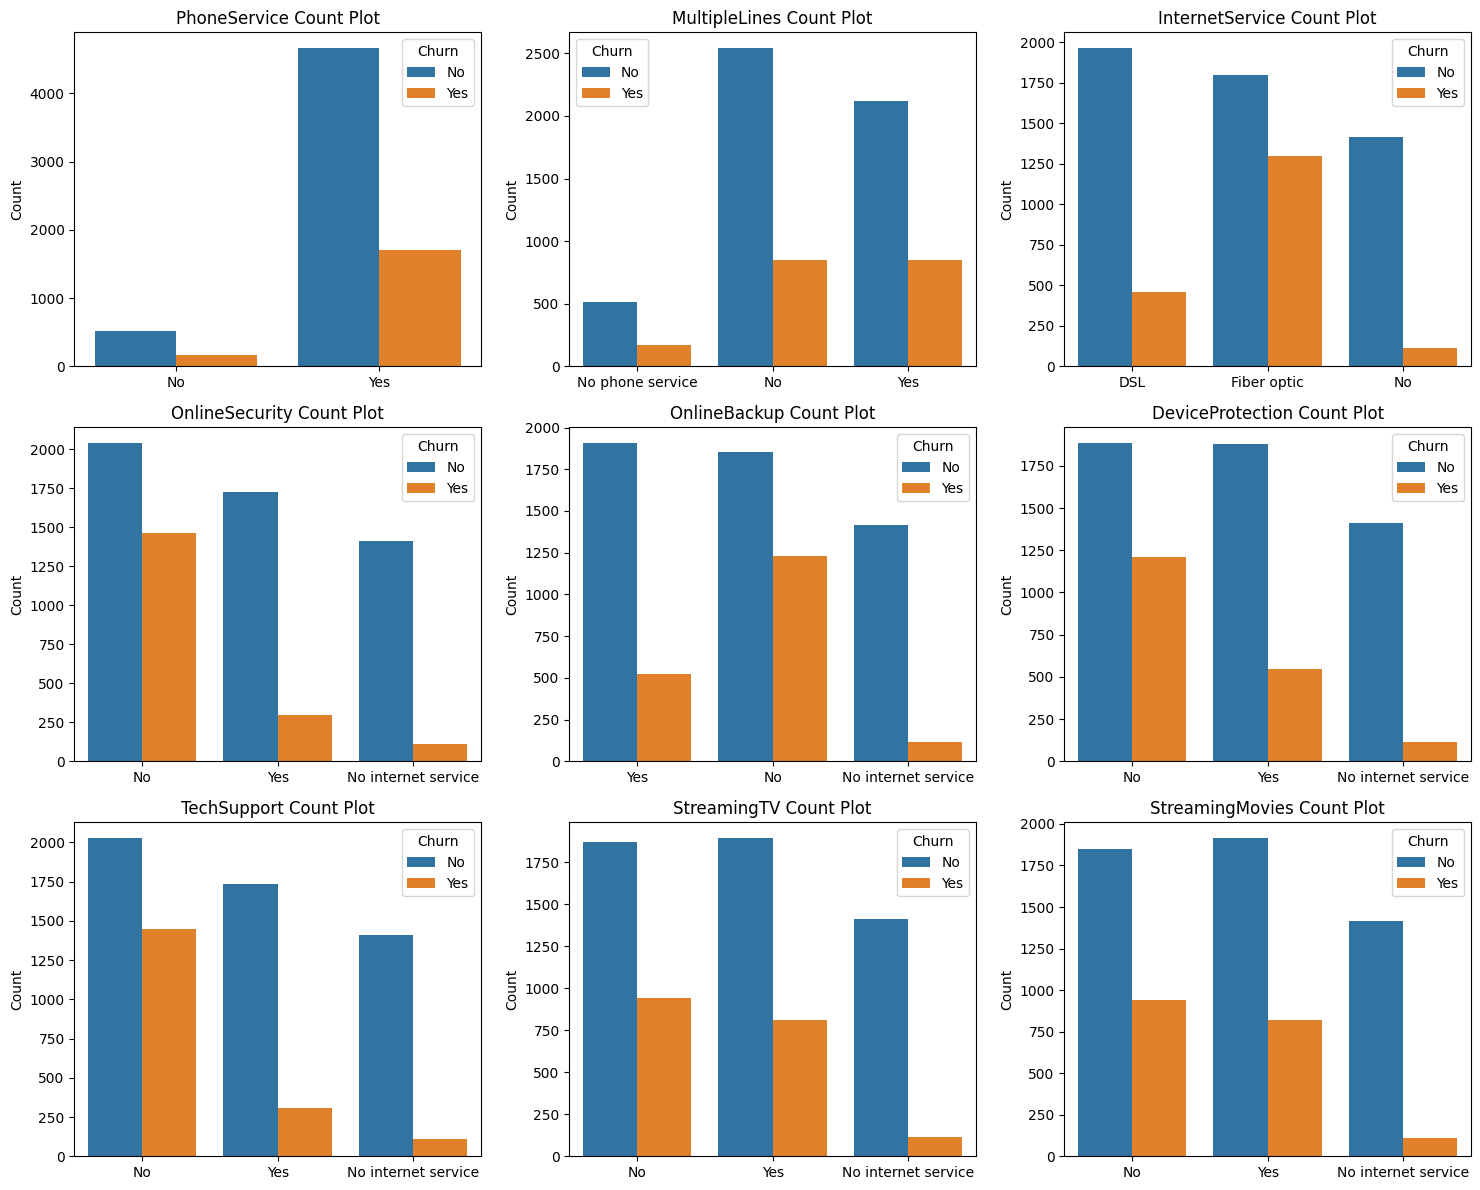

In [31]:
# List of columns to create subplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows and columns for subplots
n_rows = 3
n_cols = 3

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.ravel()  # Flatten the axes for easy iteration

# Plot each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df['Churn'])  # Updated line without the warning 
    axes[i].set_title(f'{col} Count Plot')    #hue is updated by myself to filter or distribute the data by 'churn'
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Features like PhoneService, MultipleLines, and InternetService highlight clear trends, with churn rates differing 
#### significantly based on service usage. Categories such as OnlineSecurity, TechSupport, and DeviceProtection indicate
#### higher churn rates for customers without these services

#### ..........

#### Now we analysis according to count of **Payment Method** 

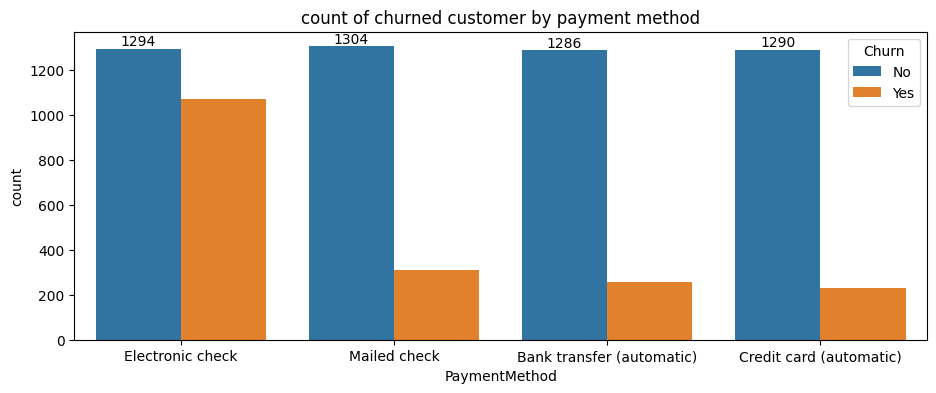

In [36]:
plt.figure(figsize = (11,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')

ax.bar_label(ax.containers[0])
plt.title("count of churned customer by payment method")
plt.show()

#### So we Identifies that whose customer pay in form of electronic check has highest level of churn 

## **"Telecom Customer Churn Analysis" Project Report**
#### This project focuses on understanding and analyzing factors influencing customer churn in the telecom industry
#### using a structured data analysis approach.
#### **Below is a summary of the analysis and key insights:**

## **Project Steps:**
### **1.Importing Libraries:** Utilized pandas, numpy, matplotlib, and seaborn for data handling and visualization.

### **2.Data Loading and Cleaning:**
#### (i)Blank values in the "tenure" column were replaced with 0.
#### (ii)Converted data types for better usability, e.g., "Senior Citizen" was transformed into categorical values ("Yes", "No").

### **3.Exploratory Data Analysis:**
#### **(i)Descriptive Statistics:** The dataset's basic properties were summarized:
#### This provided metrics like mean, median, and standard deviation for numerical fields.
#### (ii)Churn Overview:
#### >The overall churn rate was visualized using pie and count plots.
#### >Example:
#### >A pie chart showed churn proportions with a high-level visual:
#### **Customers Retained: ~73%**
#### **Customers Churned: ~27%.**
#### (iii)Senior Citizen Churn Analysis:
#### >A bar chart depicted churn distribution based on senior citizen status.
#### Key insight: **Senior citizens had a slightly higher churn rate.**

### **4.Key Statistical Insights:**

#### **(i)Grouping and Aggregation:** Analysis of churn across customer segments revealed trends in:
#### >Monthly charges.
#### >Contract types (e.g., month-to-month had higher churn).
#### >Internet service usage.
#### **(ii)Churn Percentage by Senior Citizen:**
#### >Stacked bar charts provided percentages:
#### **Senior citizens: ~40% churned.**
#### **Non-senior citizens: ~25% churned.**

### **5.Visualizations:** Multiple visualizations were used to highlight the data trends, such as pie charts, count plots, and stacked bar graphs.

## **Key Findings and Recommendations:**
### **1.High-Risk Segments:**
#### >Customers with month-to-month contracts or high monthly charges are more likely to churn.
#### >Senior citizens exhibit higher churn rates compared to non-senior citizens.

### **2.Strategic Actions:**
#### >Promote long-term contracts with discounts or incentives.
#### >Introduce targeted retention programs for senior citizens.
#### >Optimize pricing strategies to reduce churn among customers with high monthly charges.

## **Conclusion**
#### The Telecom Customer Churn Analysis project provides a comprehensive understanding of factors contributing to customer churn in the telecom industry. Through data cleaning, descriptive analysis, and visualization, the following key conclusions were drawn:

#### **1.Churn Drivers:**
#### >High churn rates are prevalent among customers with:
#### >Month-to-month contracts.
#### >High monthly charges.
#### >Limited tenure or short-term service usage.
#### >Senior citizens are more likely to churn compared to younger demographics.

#### **2.Customer Behavior:**
#### >Customers prefer stability and value; churn is significantly lower among those with long-term contracts or bundled services.

#### **3.Insights for Retention:**
#### >Offering discounts or value-added services to customers at risk of churn can improve retention.
#### >Focused retention strategies targeting senior citizens and high-paying customers could yield significant results.


